<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
    Andrés Ramírez Villanueva

**Fecha:** 23 de junio del 2021.

**Expediente** : IF726061
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/andres1999iteso/Tarea-6_ARamirez_V

# Tarea 6: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
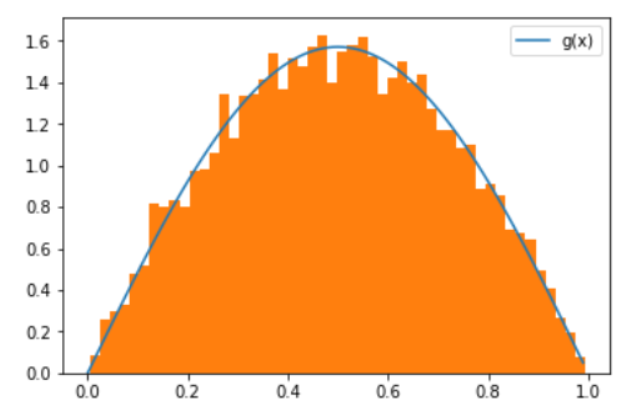

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
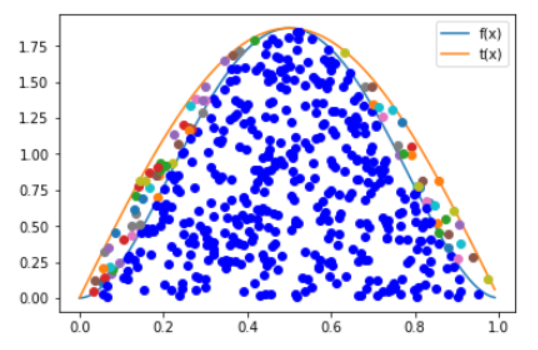

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
   
Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

# Librerías

In [206]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# Problema 1

Máximo de f, es:  [1.875]
Comprobamos que 𝑡(𝑥)≥𝑓(𝑥)


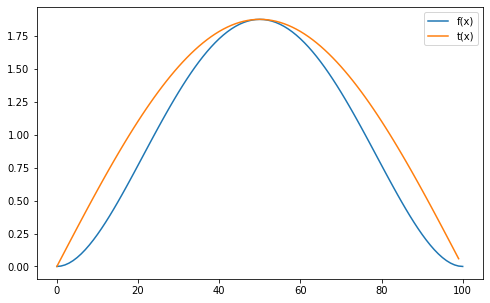

In [207]:
def funcion(x):
    return 30*(x**2 -2*x**3 + x**4)

opt = funcion(optimize.fmin(lambda x:-funcion(x), 0, disp=False))

def funcion_2(x):
    return(c*np.sin(np.pi*x))

espacio = np.linspace(0,1,101)

f = list(map(funcion, espacio))
t = list(map(funcion_2, x))

plt.figure(figsize=(8,5))
plt.plot(f, label='f(x)');
plt.plot(t, label='t(x)');
plt.legend()
print('Máximo de f, es: ', opt)
print('Comprobamos que 𝑡(𝑥)≥𝑓(𝑥)')

# Problema 2

Se define la variable C, igualamos, posteriormente integramos  y evaluamos, dando como resultado la expresión resultante que se muestra a continuación.

$c = \int_{-\infty}^{\infty} t(x) dx$

$g(x) = \frac{t(x)}{c}$

$\int_{0}^{1} a \sin(\pi x)dx$

$g(x) = \frac{ \pi \sin(\pi x)}{2}$

# Problema 3

Lo primero que se hace es integrar la función que se obtuvo en el paso anterior (g(x)) y evaluando desde 0 hasta x, posteriormente se iguala con "U" y despejamos x.

$ g(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2}, = \frac{1}{2}(- \cos(\pi x)+1) dx$

$ U = \frac{1}{2}(- \cos(\pi x)+1) $

$ x = \frac{\cos^{-1}(-2U+1)}{\pi} $

# Problema 4

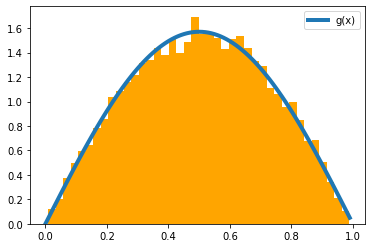

In [208]:
x = np.arange(0, 1, 0.01)

puntos = 10000
aleatorios = np.random.uniform(0, 1, puntos)
funcion_g = lambda x: np.pi/2*np.sin(np.pi*x)

funcion =  (np.arccos(-2*aleatorios+1))/(np.pi) 

plt.hist(funcion, 40, density = True, color = 'orange')
plt.plot(x, funcion_g(x), label = 'g(x)', lw = 4)
plt.legend()
plt.show()

Comprobamos que el histograma coincide con la función.

# Problema 5

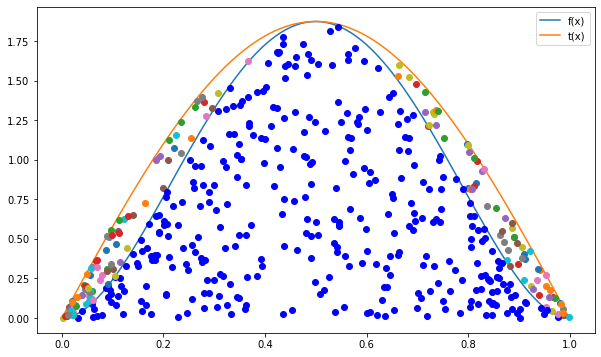

In [209]:
N = 500

funcion_f = lambda x:30*(x**2-2*x**3+x**4)
funcion_t = lambda x: opt*np.sin(np.pi*x)

def acep_rec(R2:'variable distribuida U-U(0,1)',
                 R1:'variable distribuida como g(x)',
                 f:'función objetivo',
                 t:'función mayor que f'):
    fx = f(R1)
    tx = t(R1)
    
    condicion = R2*tx<=fx
    
    [plt.plot(R1[i],R2[i]*tx[i],'ob') if condicion[i] else plt.plot(R1[i],R2[i]*tx[i],'o') for i in range(len(R1))]
    
    fin = [i for i in range(len(R1)) if condicion[i]]
    plt.show()
    
    return fin            
    
    


x = np.arange(0,1,0.01)

plt.figure(figsize=(10, 6))
plt.plot(x,funcion_f(x),label='f(x)')
plt.plot(x,funcion_t(x),label='t(x)')
plt.legend()
r2 = np.random.rand(N)
r1 = np.random.rand(N)

final=acep_rec(r2,r1,funcion_f,funcion_t)

# Problema 6

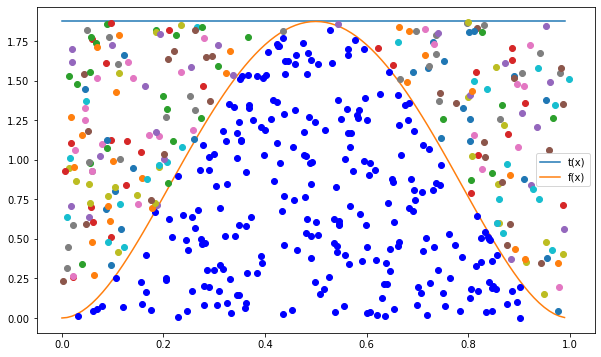

In [210]:
t = lambda x: f_max * np.ones(len(x))

f_max = funcion_f(optimize.fmin(lambda x:-funcion_f(x), 0, disp=False))[0]

plt.figure(figsize=(10, 6))

plt.plot(x, t(x),label='t(x)')
plt.plot(x, funcion_f(x),label='f(x)')
plt.legend()

fin2 = acep_rec(r2, r1, funcion_f, t)

In [211]:
print(f'{len(fin2)/500*100} % aceptados con t(x) constante')

50.8 % aceptados con t(x) constante


In [212]:
print(f'{len(final)/500*100} % aceptados con t(x) senoidal')

68.8 % aceptados con t(x) senoidal


# Problema 7

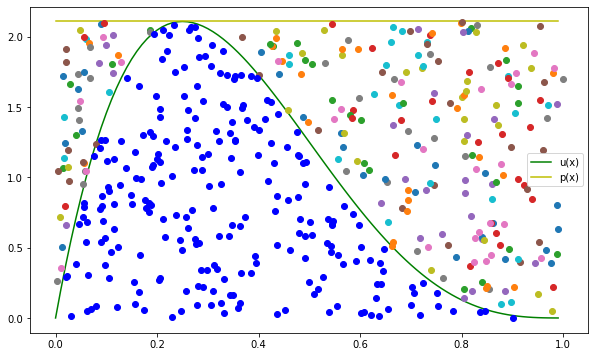

In [213]:
N = 1000

x = np.arange(0, 1, 0.01)

def u(x):
    return 20*x*(1-x)**3

p = lambda x: np.max(u(x)) * np.ones([len(x)])

plt.figure(figsize=(10, 6))
plt.plot(x,u(x),'g',label='u(x)')
plt.plot(x,p(x),'y',label='p(x)')
plt.legend()

acep_rec(r2,r1,u,p)
plt.show()

# Problema 8

Tomando como referencia lo visto en clase:
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$


Tomamos la fórmula anterior y adecuamos a lo que nos interesa, sumando 1 a i.

$ p_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$

Aplicamos algunas propiedades para que sea posible simplificar y eliminar términos:

$ p_{i+1}=\frac{n!}{(i+1)(i)!(i+1)(n-i)!}p^{i+1}(1-p)^{n-(i+1)}$

Resultado final:

$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $

Como podemos observar se cumple la igualdad.

# Problema 9

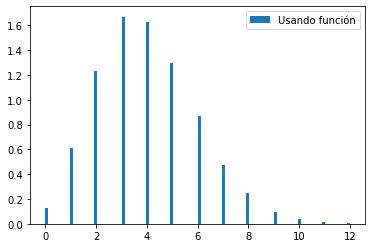

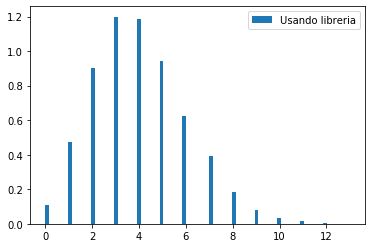

In [214]:
n = 12
N = 10000
l = 4
var = np.random.rand(N)

def poison(k,l):
    
    global vector
    vector = np.zeros(k)
    vector[0] = np.exp(-l)
    
    def fun(i):
        vector[i+1]=l/(i+1)*vector[i]
        
    [fun(i) for i in range(k-1)]
    return np.cumsum(vector)



acum = poison(n,l)

poison_1 = list(map(lambda i:sum(1 for j in acum if j<var[i]),range(N)))
plt.hist(poison_1,100,density=True,label='Usando función')
plt.legend()
plt.show()

poison_2 = np.random.poisson(l,N)
plt.hist(poison_2,80,density=True,label='Usando libreria')
plt.legend()
plt.show()

#Comparamos ambos métodos para ver que funciona nuestro código.

Demostrar que:

$ P(k+1) = \frac{\lambda}{k+1}P(k)$

Desarrollo aritmético:

$k! = k(1+k)!$

$ \frac{k!}{(k+1)!} = \frac{1}{k+1}$

$P(k+1) = \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}}$

$P(k+1) = \frac{\lambda}{(k+1)}P(k)$

Se omitieron algunos pasos dado que son meramente simplificación.